
### Name: Dubey Aarav Shailesh

### RegNo: 2347114

### 5 MCA A

### NNDL - LAB 3

### 1. Data Preprocessing: 

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Data Preprocessing
# Normalize pixel values to between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode class labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 200s 1us/step


### 2. Network Architecture Design: 


In [2]:
# Define the model architecture
model = models.Sequential()

# Input Layer
model.add(layers.InputLayer(input_shape=(32, 32, 3)))

# Hidden Layer 1: Convolutional + ReLU Activation + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Hidden Layer 2: Convolutional + ReLU Activation + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Hidden Layer 3: Convolutional + ReLU Activation + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output Layer: 10 classes with Softmax Activation
model.add(layers.Dense(10, activation='softmax'))


c:\Users\daara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### 3. Training the Model: 

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,978 (2.49 MB)

 Trainable params: 651,978 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Train The model

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.3735 - loss: 1.6821 - val_accuracy: 0.6056 - val_loss: 1.0992
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.6387 - loss: 1.0232 - val_accuracy: 0.6824 - val_loss: 0.9036
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7195 - loss: 0.7985 - val_accuracy: 0.7147 - val_loss: 0.8292
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.7637 - loss: 0.6643 - val_accuracy: 0.7348 - val_loss: 0.7798
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8013 - loss: 0.5654 - val_accuracy: 0.7384 - val_loss: 0.7633
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8293 - loss: 0.4805 - val_accuracy: 0.7488 - val_loss: 0.7675
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8591 - loss: 0.3991 - val_accuracy: 0.7478 - val_loss: 0.7979
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8911 - loss: 0.3123 - 

### 5. Evaluate the model

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7240 - loss: 2.2522

Test Accuracy: 0.7211999893188477


### 6.Vizualize

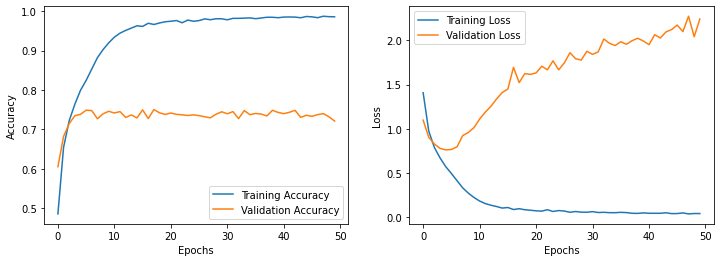

In [6]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 6. Model Evaluation

In [7]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76      1000
           1       0.85      0.86      0.85      1000
           2       0.62      0.66      0.64      1000
           3       0.50      0.57      0.53      1000
           4       0.72      0.58      0.64      1000
           5       0.66      0.54      0.59      1000
           6       0.82      0.72      0.77      1000
           7       0.77      0.79      0.78      1000
           8       0.83      0.85      0.84      1000
           9       0.78      0.81      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



### 7. Confusion Matrix

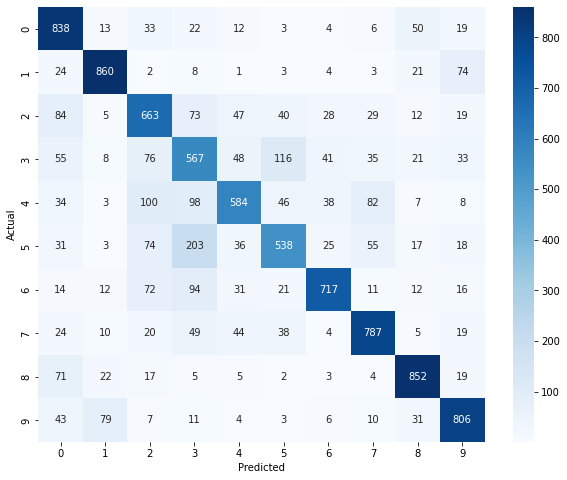

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 


### CIFAR-10 Image Classification Using Neural Networks and Backpropagation
The CIFAR-10 dataset consists of 60,000 color images of size 32x32 pixels, divided into 10 classes (airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks). 

### 1. Data Preprocessing

We loaded the CIFAR-10 dataset using TensorFlow/Keras's `datasets` module and performed the following preprocessing steps:
- **Normalization:** Pixel values were scaled to the range [0, 1] to make the data easier for the network to process.
- **One-Hot Encoding:** The class labels were converted into one-hot encoded format since this is a multi-class classification problem.
- **Data Splitting:** The dataset was split into a training set (50,000 images) and a test set (10,000 images). This split ensures that the model generalizes well to unseen data.

### 2. Network Architecture Design

We designed a convolutional neural network (CNN) with the following layers:
- **Input Layer:** The input shape is (32, 32, 3) since CIFAR-10 images have 32x32 pixels with 3 color channels (RGB).
- **Convolutional Layers:** These layers extract local features from the images. We used 3 convolutional layers with filters of size 32, 64, and 64 respectively, and a kernel size of (3,3).
- **Pooling Layers:** Max-pooling layers are added to reduce the spatial dimensions, thus down-sampling the feature maps and reducing computational complexity.
- **Flatten Layer:** This layer flattens the 3D feature maps into 1D vectors, preparing the data for the fully connected layers.
- **Fully Connected (Dense) Layers:** We used two dense layers—one hidden layer with 64 neurons and an output layer with 10 neurons (one for each class). The final output layer uses the **softmax** activation function for multi-class classification.

### 3. Activation Functions

- We used the **ReLU (Rectified Linear Unit)** activation function for the hidden layers. ReLU introduces non-linearity into the model and is computationally efficient, making it a popular choice in deep learning models.
- The **softmax** activation function was applied in the output layer, as it converts the raw output scores into class probabilities.

### 4. Loss Function and Optimizer

- We selected **categorical cross-entropy** as the loss function, which is widely used in multi-class classification problems. This loss function measures the dissimilarity between the true labels and the predicted probabilities.
- For optimization, we chose the **Adam** optimizer. Adam is an adaptive learning rate optimization algorithm that combines the advantages of both RMSprop and SGD, and it converges faster in practice.
- The learning rate is a crucial hyperparameter that controls how much the model updates its weights during training. A learning rate that's too high can cause the model to overshoot the optimal solution, while a rate that's too low may slow down the convergence.

### 5. Model Training

We trained the model for 50 epochs using backpropagation to update the weights. Backpropagation calculates the gradients of the loss with respect to each weight in the network and updates the weights using the optimizer’s rules.

During training, both the training and validation accuracies were monitored to track the model’s performance and avoid overfitting. Early stopping or adjusting learning rates can prevent overfitting and lead to smoother convergence.

### 6. Model Evaluation

To improve neural network performance with low accuracy, you can:

1. **Tune hyperparameters** (e.g., learning rate, batch size).
2. **Increase model complexity** by adding more layers or neurons.
3. **Use regularization techniques** (e.g., dropout, L2 regularization) to reduce overfitting.
4. **Collect more training data** to improve generalization.
5. **Optimize the architecture** (e.g., using CNNs for images, RNNs for sequences).
6. **Adjust the optimizer** (e.g., switch to Adam, RMSprop).
7. **Improve feature engineering** or use better preprocessing techniques.
8. **Check for data imbalance** and apply techniques like resampling or weighting.

### 7. Optimization Strategies

To further improve the model's performance:
- **Early Stopping:** Can be used to stop training when the validation performance stops improving, preventing overfitting.
- **Learning Rate Scheduling:** Gradually decreasing the learning rate during training can lead to smoother convergence.
- **Weight Initialization:** Proper initialization of weights helps avoid vanishing or exploding gradients, making training more efficient.
- Why is weight initialization important? 
Weight initialization is crucial because poor initial weights can slow or prevent convergence. Good initialization ensures faster learning by keeping gradients in a reasonable range, improving network performance and stability.
